In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('sample/lobby-9-11-21-0900hrs-clean.csv')

In [31]:
df.time.head()

0    2021-11-10T00:00:44.574Z
1    2021-11-10T00:01:44.550Z
2    2021-11-10T00:02:44.518Z
3    2021-11-10T00:03:44.510Z
4    2021-11-10T00:04:44.500Z
Name: time, dtype: object

### Clean date data

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df.time.head()

0   2021-11-10 00:00:44.574000+00:00
1   2021-11-10 00:01:44.550000+00:00
2   2021-11-10 00:02:44.518000+00:00
3   2021-11-10 00:03:44.510000+00:00
4   2021-11-10 00:04:44.500000+00:00
Name: time, dtype: datetime64[ns, UTC]

In [6]:
df

,temperature,time
0,29.9,2021-11-10 00:00:44.574000+00:00
1,29.9,2021-11-10 00:01:44.550000+00:00
2,29.9,2021-11-10 00:02:44.518000+00:00
3,29.9,2021-11-10 00:03:44.510000+00:00
4,29.9,2021-11-10 00:04:44.500000+00:00
...,...,...
96011,30.4,2022-01-16 23:55:04.057000+00:00
96012,30.4,2022-01-16 23:56:04.074000+00:00
96013,30.4,2022-01-16 23:57:04.077000+00:00
96014,30.4,2022-01-16 23:58:03.997000+00:00


### Sort columns by hour

In [7]:
# df = df[0::60]
# df

<AxesSubplot: >

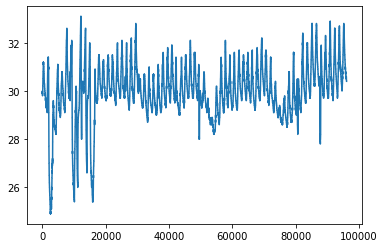

In [8]:
temp = df['temperature']
temp.plot()

### View data dimension

In [9]:
shape = df.shape
print('DataFrame Shape :', shape)
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])

DataFrame Shape : (96016, 2)
Number of rows : 96016
Number of columns : 2


### Breakdown data and label (Supervise learning)

In [10]:
window_size = 5

In [11]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((96011, 5, 1), (96011,))

In [13]:
# X_train1, y_train1 = X1[:60000], y1[:60000]
# X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
# X_test1, y_test1 = X1[65000:], y1[65000:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

### Split training, validation and testing data

In [14]:
X_train1, y_train1 = X1[:50000], y1[:50000]
X_val1, y_val1 = X1[50000:60000], y1[50000:60000]
X_test1, y_test1 = X1[60000:], y1[60000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((50000, 5, 1), (50000,), (10000, 5, 1), (10000,), (36011, 5, 1), (36011,))

### Configure model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


### Compile and save model

In [16]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [17]:
# import absl.logging
# absl.logging.set_verbosity(absl.logging.ERROR)

### Fit model

In [18]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1557/1563 [============================>.] - ETA: 0s - loss: 408.0078 - root_mean_squared_error: 20.1992

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 16s 9ms/step - loss: 406.9298 - root_mean_squared_error: 20.1725 - val_loss: 95.4732 - val_root_mean_squared_error: 9.7710
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 29.1711 - root_mean_squared_error: 5.4010

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 13s 8ms/step - loss: 29.1711 - root_mean_squared_error: 5.4010 - val_loss: 0.9171 - val_root_mean_squared_error: 0.9576
Epoch 3/10
1559/1563 [============================>.] - ETA: 0s - loss: 1.8361 - root_mean_squared_error: 1.3550

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 12s 8ms/step - loss: 1.8358 - root_mean_squared_error: 1.3549 - val_loss: 0.7259 - val_root_mean_squared_error: 0.8520
Epoch 4/10
1557/1563 [============================>.] - ETA: 0s - loss: 1.7486 - root_mean_squared_error: 1.3223

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 12s 8ms/step - loss: 1.7488 - root_mean_squared_error: 1.3224 - val_loss: 0.7053 - val_root_mean_squared_error: 0.8398
Epoch 5/10
1555/1563 [============================>.] - ETA: 0s - loss: 1.6825 - root_mean_squared_error: 1.2971

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 13s 9ms/step - loss: 1.6793 - root_mean_squared_error: 1.2959 - val_loss: 0.4970 - val_root_mean_squared_error: 0.7050
Epoch 6/10
1556/1563 [============================>.] - ETA: 0s - loss: 0.2241 - root_mean_squared_error: 0.4734

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 12s 8ms/step - loss: 0.2232 - root_mean_squared_error: 0.4725 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 7/10
1554/1563 [============================>.] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1036

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 12s 8ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0711
Epoch 8/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0689

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 12s 8ms/step - loss: 0.0047 - root_mean_squared_error: 0.0689 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 9/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0512

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 12s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 10/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0421

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1563/1563 [==============================] - 14s 9ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348


In [19]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [20]:
#from tensorflow.keras.layers import Flatten
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1563/1563 [==============================] - 5s 3ms/step


,Train Predictions,Actuals
0,29.883486,29.9
1,29.883486,29.9
2,29.883486,29.9
3,29.883486,29.9
4,29.883486,29.9
...,...,...
49995,29.682056,29.7
49996,29.682056,29.7
49997,29.682056,29.7
49998,29.682056,29.7


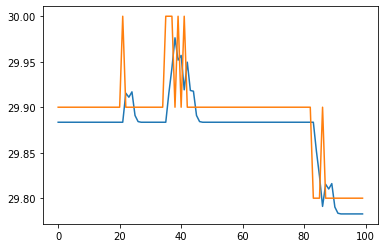

In [21]:
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

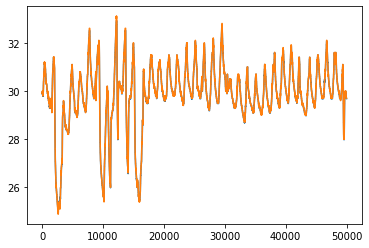

In [22]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [23]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

313/313 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,29.682056,29.7
1,29.682056,29.7
2,29.682056,29.6
3,29.650383,29.6
4,29.623211,29.7
...,...,...
9995,29.372749,29.4
9996,29.380068,29.4
9997,29.380856,29.4
9998,29.380856,29.4


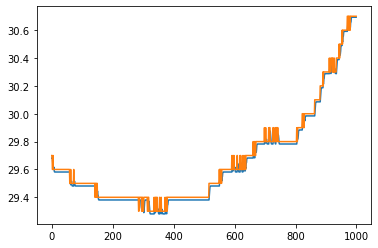

In [24]:
plt.plot(val_results['Val Predictions'][:1000])
plt.plot(val_results['Actuals'][:1000])

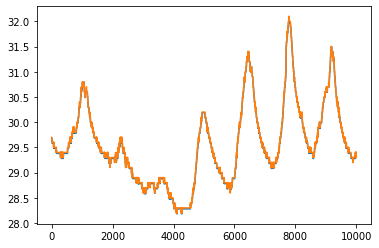

In [25]:
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [26]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

1126/1126 [==============================] - 3s 2ms/step


,Test Predictions,Actuals
0,29.380856,29.4
1,29.380856,29.4
2,29.380856,29.4
3,29.380856,29.4
4,29.380856,29.4
...,...,...
36006,30.389008,30.4
36007,30.389008,30.4
36008,30.389008,30.4
36009,30.389008,30.4


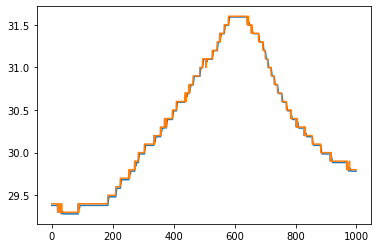

In [27]:
plt.plot(test_results['Test Predictions'][:1000])
plt.plot(test_results['Actuals'][:1000])

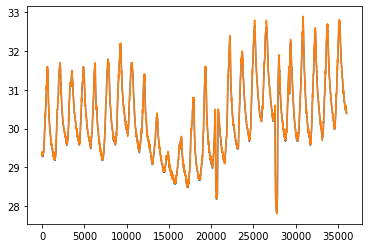

In [28]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])